In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/weth_wpls.pkl"))

In [2]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0x42AbdFDB63f3282033C766E72Cc4810738571609,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274020,0x72fc0b20baa7d19b7de0bfe8a5b5d0e6c3d76e77f5c2...,15,0x02c7254027ba3f413975619e875f3674e339ae519452...,58,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694432,4156916535257563
1,0x42AbdFDB63f3282033C766E72Cc4810738571609,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274020,0x72fc0b20baa7d19b7de0bfe8a5b5d0e6c3d76e77f5c2...,15,0x02c7254027ba3f413975619e875f3674e339ae519452...,59,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694432,4156916535257563
2,0x42AbdFDB63f3282033C766E72Cc4810738571609,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17274020,0x72fc0b20baa7d19b7de0bfe8a5b5d0e6c3d76e77f5c2...,15,0x02c7254027ba3f413975619e875f3674e339ae519452...,60,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694432,4156916535257563
3,0x42AbdFDB63f3282033C766E72Cc4810738571609,Mint,[0xdbba30eb0402b389513e87f51f4db2db80bed454384...,0x00000000000000000000000000000000000000000000...,17274020,0x72fc0b20baa7d19b7de0bfe8a5b5d0e6c3d76e77f5c2...,15,0x02c7254027ba3f413975619e875f3674e339ae519452...,61,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694432,4156916535257563
4,0x42AbdFDB63f3282033C766E72Cc4810738571609,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17274538,0xe6fc3cefb5f53b135bc3e078218a20920d7a16716156...,31,0x7ce5b0692defe3d6b3e5e677803f54bce9aaeee979b7...,69,0x1bf94AcE856a08c4d011F5Fdcd8E3951d51C63B9,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,436984,4058607956975415


<Axes: ylabel='event_name'>

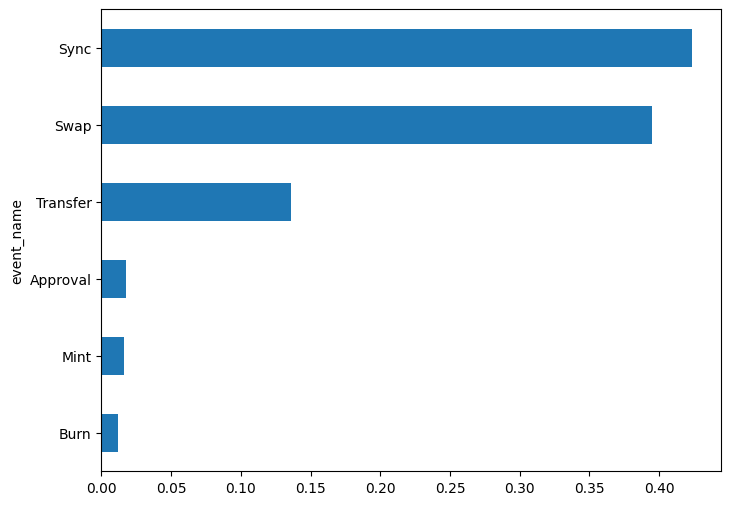

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

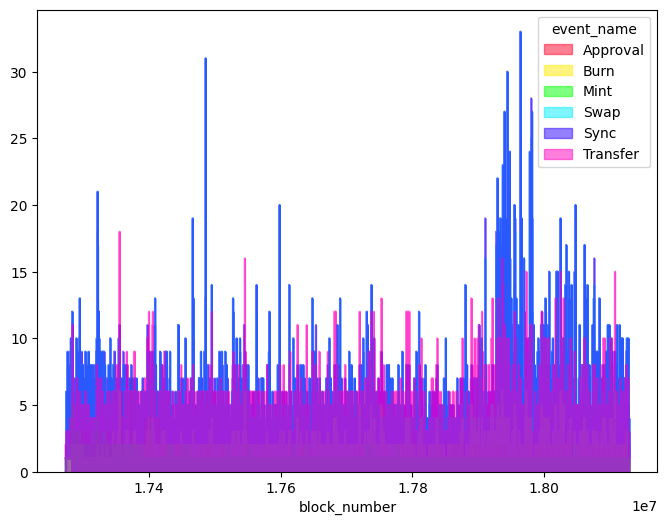

In [4]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [5]:
areaplot

event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17274020,0.0,0.0,1.0,0.0,1.0,2.0
17274538,0.0,0.0,0.0,1.0,1.0,0.0
17274541,0.0,0.0,0.0,1.0,1.0,0.0
17274706,0.0,0.0,1.0,0.0,1.0,2.0
17274718,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
18128554,0.0,0.0,0.0,1.0,1.0,0.0
18128559,0.0,0.0,0.0,2.0,2.0,0.0
18128581,0.0,0.0,0.0,1.0,1.0,0.0
